<a href="https://colab.research.google.com/github/andrillion/Projects/blob/master/tail_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Tail Assignment Problem

<img src="https://imengine.public.prod.sbp.infomaker.io/?uuid=af6303f6-7342-5ed8-8239-4c2b8bc5d4bb&function=cropresize&type=preview&source=false&q=75&crop_w=0.99999&crop_h=0.84428&width=1500&height=844&x=1.0E-5&y=0.03002" alt="Alternativ text" width="800" height="450">






## 1. Introduction
The Tail Assignment Problem (TAP) is a key challenge for airlines, where the task is to assign one aircraft to each route within a time period. The primary objective is to ensure complete route coverage while minimizing operational costs, such as fuel, maintenance and crew etc. By solving the TAP, airlines can streamline their operations and increase overall efficiency.

## 2.Background

The aircraft scheduling process is a multi-step procedure that begins with forecasting demand for flights between potential city pairs. This is followed by determining the most suitable aircraft type for each route based on expected passenger demand and the distance to be flown. Once the appropriate aircraft type is selected, maintenance schedules are incorporated to ensure the safety and operability of the fleet. The next step involves performing a Tail Assignment, where individual aircraft are assigned to specific routes, ensuring that operational constraints such as crew availability, aircraft maintenance, and minimal downtime are met.

<br>

In cases where the fleet is homogeneous, such as with airlines like Ryanair and Norwegian that operate with mostly one type of aircraft (variations of Boeing 737s), the flexibility in scheduling increases, providing more possible combinations to optimize the flight schedule.

<br>

This project focus on the tail assignment phase, applying optimization techniques to allocate aircraft of the same capacity to routes in a network.

## 3.Method


### 3.1 Assumptions

In the base model of this project, I have made the following assumptions:
<br>


*   The routing and maintenance optimization has been solved beforehand, handling demand and capacity constraints.
<br>

*   All aircrafts in this model have roughly the same capacity (amount of seats)
<br>

*   All aircrafts are available.
<br>

*   We have a balanced assignment problem, i.e the number of aircraft *i* equals the number of routes *j*.
<br>

*   All aircrafts must be assigned to exactly one route
<br>

*   All routes must be covered by exactly one aircraft
<br>

*   Time period of one day is considered. For multiple time periods, one need to add a time dimension *t* and take into consideration continuity between time periods
<br>


*   The purpose is to find the most cost efficient combination to assign aircrafts to routes
<br>

*   The cost components are: fuel, maintenance and crew
<br>

*   Due to lack of real data, synthetic cost data has been generated to demonstrate the concept
<br>














### 3.2 Model formulation

<br>


*   The Tail assignment problem can be modeled as a BIP (binary integer programming) model since it´s a scheduling problem and we only have binary decision variables in this case.

<br>

*   If we add more complex constraints or continuous variables, the BIP converts into a MILP model (which it does in a real-world setting).


<br>



### **Objective Function:**
<br>

The goal is to minimize the total cost \(C\), given by:

<br>

$$
\text{Minimize} \quad C = \sum_{i=1}^{n} \sum_{j=1}^{m} c_{ij} \cdot x_{ij}
$$

<br>

Where:

$$
\begin{align*}
c_{ij} & = \text{the cost of assigning aircraft } i \text{ to route } j
\\
\\
x_{ij} & =
\begin{cases}
1 & \text{if aircraft } i \text{ is assigned to route } j \\
0 & \text{otherwise}
\end{cases}
\end{align*}
$$


<br>

### **Constraints:**

<br>

1. **Aircraft assignment constraint** - Each aircraft can only be assigned to exactly one route:

$$
\sum_{j=1}^{m} x_{ij} = 1 \quad \forall i \in \{1, 2, ..., n\}
$$

<br>

2. **Route coverage constraint** - Each route can only be covered by exactly one aircraft:

$$
\sum_{i=1}^{n} x_{ij} = 1 \quad \forall j \in \{1, 2, ..., m\}
$$

<br>

3. **Binary variables**:


$$
x_{ij} \in \{0, 1\} \quad \forall i, j
$$

<br>


### 3.3 Model explanation


*   The goal is to determine the values for the binary decision variables x_ij that results in the minimal total cost, while simultaneously satisfying all constraints.

<br>



*   Each binary decision variable x_ij is multiplied by its corresponding cost c_ij. When x_ij = 1, it indicates that aircraft (i) is assigned to route (j), which implies that the cost c_ij is included as part of the objective function. If x_ij = 0, the corresponding cost c_ij is NOT included in the objective function.


<br>



*   The first constraint states that the sum of each row in the assignment matrix is 1. This means that each aircraft *i* can only be assigned to exactly one route *j*.

<br>

*   The second constraint states that the sum of each column in the assignment matrix is 1. This means that each route *j* must be covered by aircraft *i* and guarantees that every route is scheduled with an aircraft.

<br>

*   The third constraint states that decision variables *x_ij* can either be 0 or 1.

<br>

*   Together, these constraints ensure that each aircraft is used while every route is covered.

<br>



### 3.4 Variations

#### 3.4.1 Aircrafts > routes


**Aircraft assignment constraint:**

In this scenario, the aircraft assingment constraint turns
into an inequality. Since we have more aircraft than routes, the least cost effective aircraft wont be assigned.

<br>

$$\sum_{j \in J} x_{ij} \leq 1 \quad \forall i \in I$$

<br>

In addition, if some aircrafts are unavailable, one can add an extra constraint and set all x_ij values to zero for all j in the row that corresponds to those aircrafts in the unavailable set *U*. However, the route covering constraint must remain unchanged to prevent trivial solutions, such as assigning all x_ij = 0 which will result in total cost 0.

<br>

**Unavailable aircraft constraint:**
$$
x_{ij} = 0 \quad \forall i \in U
$$


<br>







#### 3.4.2 Routes > Aircrafts


**Route covering constraint:**
*   In this scenario, there are not enough aircraft to cover all routes, forcing a relaxation of the route covering constraint to be able to find a feasible solution. This allows the model to prioritize the most profitable routes. However, since canceled flights can be very costly, an airline may consider leasing additional aircraft to temporarily cover shortages or rescheduling flights to optimize their resources.

<br>


$$
\sum_{i \in I} x_{ij} \leq 1 \quad \forall j \in J
$$


### 3.5 Cost matrices

<br>

*   A cost matrix is a two-dimensional array that represents the costs associated with assigning aircraft i to route j.

<br>

*   In a real life scenario the cost data will be sourced from a database, but here I will use randomly generated data to demonstrate the concept.

<br>

*   The total cost for an entry in the cost matrix is the sum of three individual factors: fuel, maintainance and crew/other.







In [2]:
!apt-get install -y glpk-utils
!pip install -q pyomo

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
Suggested packages:
  libiodbc2-dev
The following NEW packages will be installed:
  glpk-utils libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
0 upgraded, 5 newly installed, 0 to remove and 49 not upgraded.
Need to get 625 kB of archives.
After this operation, 2,158 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libsuitesparseconfig5 amd64 1:5.10.1+dfsg-4build1 [10.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libamd2 amd64 1:5.10.1+dfsg-4build1 [21.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libcolamd2 amd64 1:5.10.1+dfsg-4build1 [18.0 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libglpk40 amd64 5.0-1 [361 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 glpk-ut

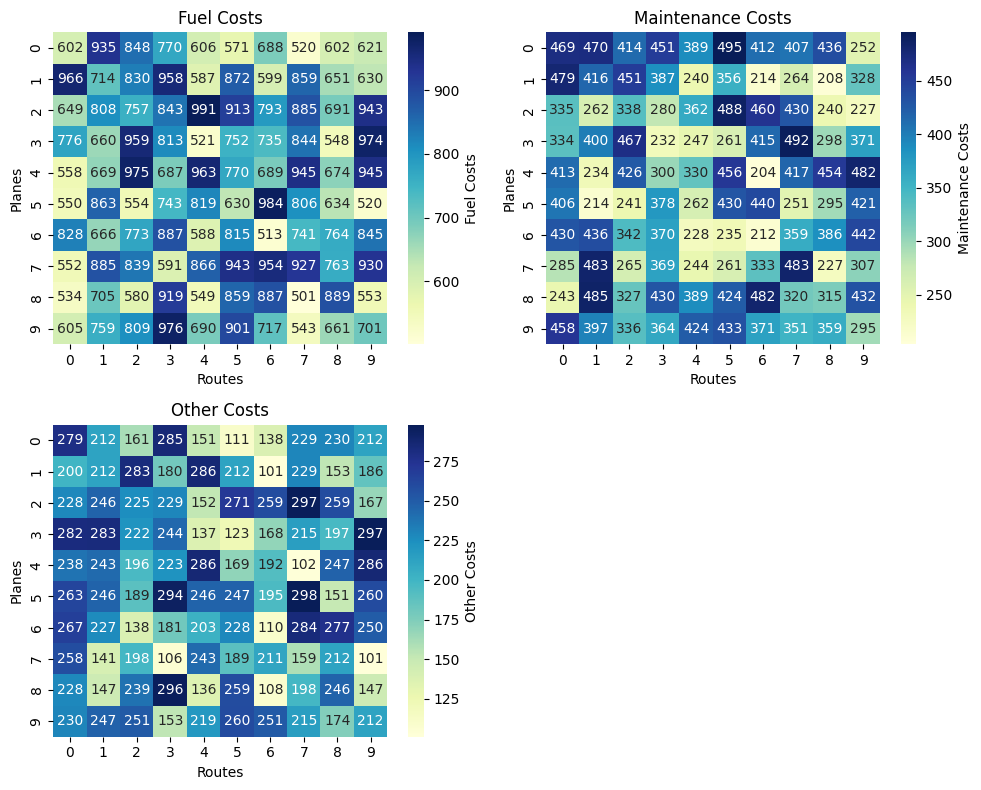

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyomo.environ import *
from pyomo.opt import SolverFactory

# Define the number of aircraft and routes
num_planes = 10
num_routes = 10

# Generate a synthetic cost matrix for each aircraft and route
np.random.seed(42)  # For reproducibility
fuel_costs = np.random.randint(500, 1000, size=(num_planes, num_routes))
maintenance_costs = np.random.randint(200, 500, size=(num_planes, num_routes))
other_costs = np.random.randint(100, 300, size=(num_planes, num_routes))

# Create heatmaps
plt.figure(figsize=(10, 8))  # Adjust the size to fit the 2x2 layout

# Heatmap for fuel costs
plt.subplot(2, 2, 1)
sns.heatmap(fuel_costs, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Fuel Costs'})
plt.title('Fuel Costs')
plt.xlabel('Routes')
plt.ylabel('Planes')

# Heatmap for maintenance costs
plt.subplot(2, 2, 2)
sns.heatmap(maintenance_costs, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Maintenance Costs'})
plt.title('Maintenance Costs')
plt.xlabel('Routes')
plt.ylabel('Planes')

# Heatmap for crew/other costs
plt.subplot(2, 2, 3)
sns.heatmap(other_costs, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Other Costs'})
plt.title('Other Costs')
plt.xlabel('Routes')
plt.ylabel('Planes')

# Empty subplot
plt.subplot(2, 2, 4)
plt.axis('off')  # Hide axes for the empty subplot

plt.tight_layout()
plt.show()




*   Note: By changing the values for fuel, maintenance and crew costs, one could experiment how such changes affect the optimal solution and simulate different scenarios. Since the airline industry is an environment with rapid changes and unexpedted events such as delays, cancellations, maintenance and variation in fuel prices, it´s of great importance to be able to adapt quickly.



In [4]:
# Assume you want to change the cost for aircraft 0 on route 1

# fuel_costs[0, 9] = 721  # Change the fuel cost for aircraft 0, route 1
# maintenance_costs[0, 9] = 1252  # Change the maintenance cost
# other_costs[0, 9] = 312  # Change the other costs

# Display the updated cost matrices

# print("Updated Fuel Costs:\n", fuel_costs)
# print("\nUpdated Maintenance Costs:\n", maintenance_costs)
# print("\nUpdated Other Costs:\n", other_costs)

# Calculate the new total cost matrix

# total_costs = fuel_costs + maintenance_costs + other_costs
# print("\nUpdated Total Costs:\n", total_costs)


### 3.6 Total cost matrix

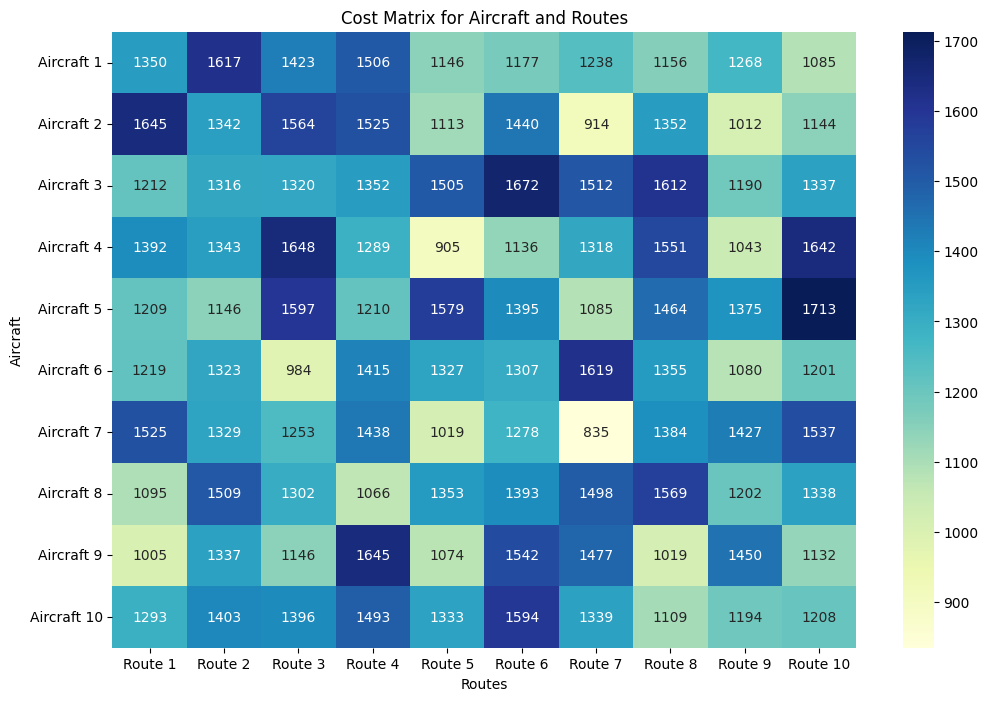

In [5]:
# Total cost matrix
total_costs = fuel_costs + maintenance_costs + other_costs

# Heatmap for the cost matrix
plt.figure(figsize=(12, 8))
sns.heatmap(total_costs, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=[f'Route {i+1}' for i in range(num_routes)],
            yticklabels=[f'Aircraft {i+1}' for i in range(num_planes)])
plt.title('Cost Matrix for Aircraft and Routes')
plt.xlabel('Routes')
plt.ylabel('Aircraft')
plt.show()


### 3.7 Implementation

The model is implemented with the Pyomo package for Python and solved with the open-source solver GLPK.

In [7]:
# Create a concrete model for assignment
model = ConcreteModel()

# Decision variables: x[i,j] = 1 if aircraft i is assigned to route j, otherwise 0
model.x = Var(range(num_planes), range(num_routes), within=Binary)

# Objective function: Minimize the total cost
def objective_rule(model):
    return sum(total_costs[i, j] * model.x[i, j] for i in range(num_planes) for j in range(num_routes))
model.objective = Objective(rule=objective_rule, sense=minimize)

# Each aircraft can be assigned to exactly one route
def one_assignment_rule(model, i):
    return sum(model.x[i, j] for j in range(num_routes)) == 1
model.one_assignment = Constraint(range(num_planes), rule=one_assignment_rule)

# Each route can be assigned to exactly one aircraft
def one_route_assignment_rule(model, j):
    return sum(model.x[i, j] for i in range(num_planes)) == 1
model.one_route_assignment = Constraint(range(num_routes), rule=one_route_assignment_rule)

# Solve the problem
solver = SolverFactory('glpk', executable='/usr/bin/glpsol')
solver.solve(model)

optimized_cost = model.objective()


# Retrieve the assignments
assignments = np.zeros((num_planes, num_routes))
for i in range(num_planes):
    for j in range(num_routes):
        assignments[i, j] = model.x[i, j]()

# Calculate total costs per route
total_route_costs = np.zeros(num_routes)
for j in range(num_routes):
    for i in range(num_planes):
        total_route_costs[j] += total_costs[i, j] * assignments[i, j]

# Calculate component costs per route
fuel_cost_per_route = np.zeros(num_routes)
maintenance_cost_per_route = np.zeros(num_routes)
other_cost_per_route = np.zeros(num_routes)

for j in range(num_routes):
    for i in range(num_planes):
        fuel_cost_per_route[j] += fuel_costs[i, j] * assignments[i, j]
        maintenance_cost_per_route[j] += maintenance_costs[i, j] * assignments[i, j]
        other_cost_per_route[j] += other_costs[i, j] * assignments[i, j]


## 4.Results



### 4.1 Optimal assignment of aircrafts to routes

The results from the BIP model is presented as a heatmap to vizualise which aircraft was combined with which route. Notice the sudoku like pattern where each row and each column has the sum of 1 (since the problem is balanced).

<br>

If we have more aircrafts than routes, some rows will have sum = 0.

<br>

If we have more routes than aircrafts, some columns will have sum = 0.

<br>

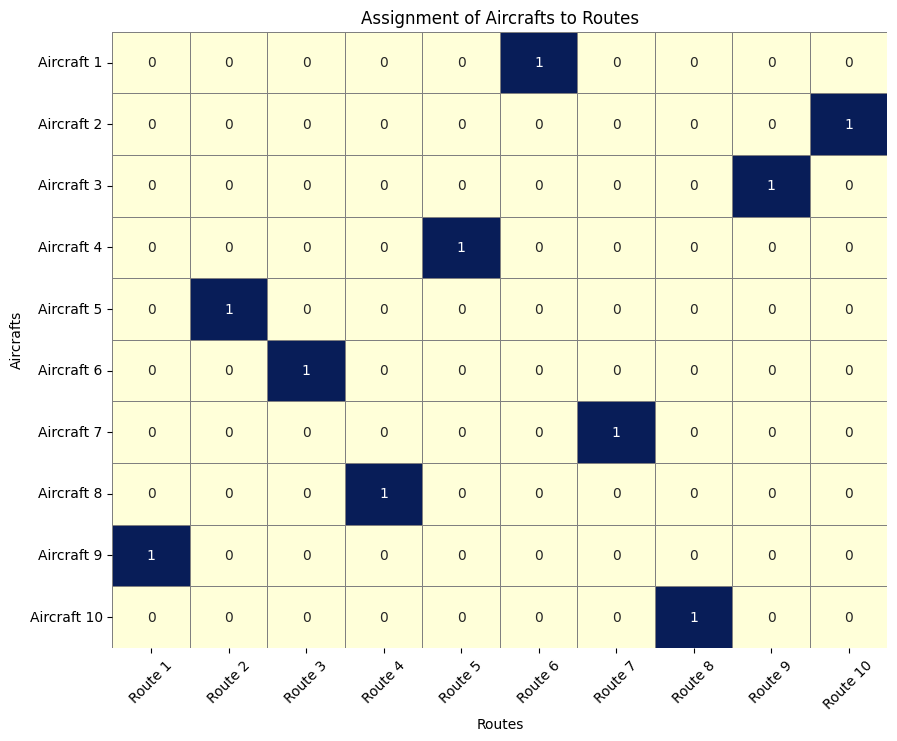

Optimized cost: 10561.00


In [8]:
# Visualization of the allocation with a heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(assignments, annot=True, cmap="YlGnBu", cbar=False, linewidths=0.5, linecolor='gray')
plt.xlabel('Routes')
plt.ylabel('Aircrafts')
plt.title('Assignment of Aircrafts to Routes')
plt.xticks(ticks=np.arange(num_routes) + 0.5, labels=[f"Route {j+1}" for j in range(num_routes)], rotation=45)
plt.yticks(ticks=np.arange(num_planes) + 0.5, labels=[f"Aircraft {i+1}" for i in range(num_planes)], rotation=0)
plt.show()

print(f'Optimized cost: {optimized_cost:.2f}')


*   In the matrix above, we can see the optimal solution, that gives the overall lowest cost when assigning aircraft to routes.



*   By comparing the solution matrix with the corresponding positions in the cost matrix, we can see which costs was selected in the optimal solution.



### 4.2 Total cost per route

The plot represents the total costs for the aircrafts and route pairings in the optimal solution.


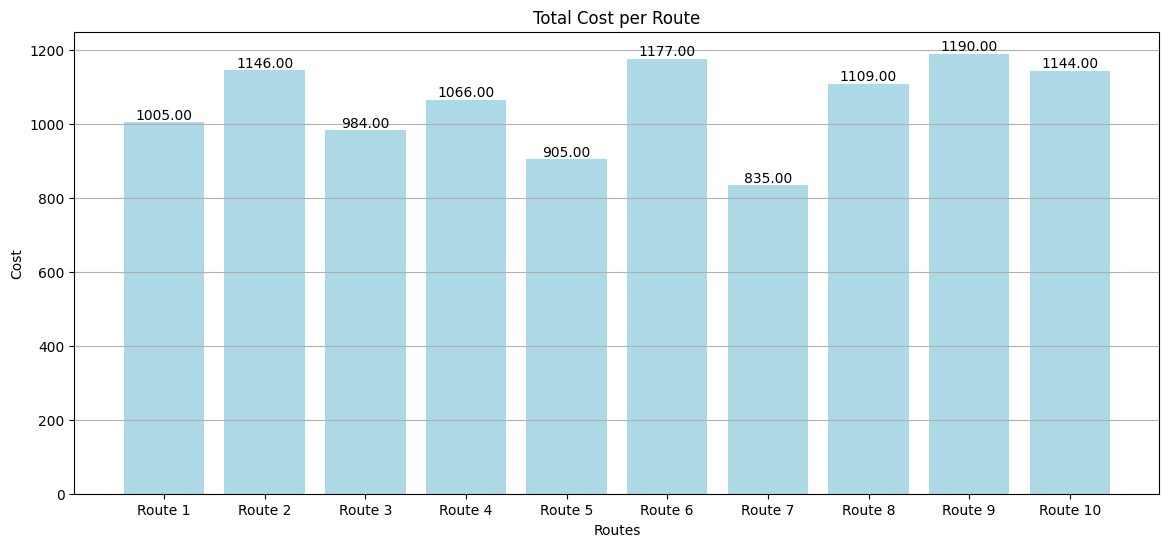

In [9]:
# Visualization of total costs per route
plt.figure(figsize=(14, 6))
bars = plt.bar(range(num_routes), total_route_costs, color='lightblue', label='Total cost')
plt.xticks(range(num_routes), [f'Route {i+1}' for i in range(num_routes)])
plt.title('Total Cost per Route')
plt.xlabel('Routes')
plt.ylabel('Cost')

# Annotate y-value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.grid(axis='y')
plt.show()

### 4.3 Cost breakdown per route

More detailed plot of the costs for each route in the optimal solution.

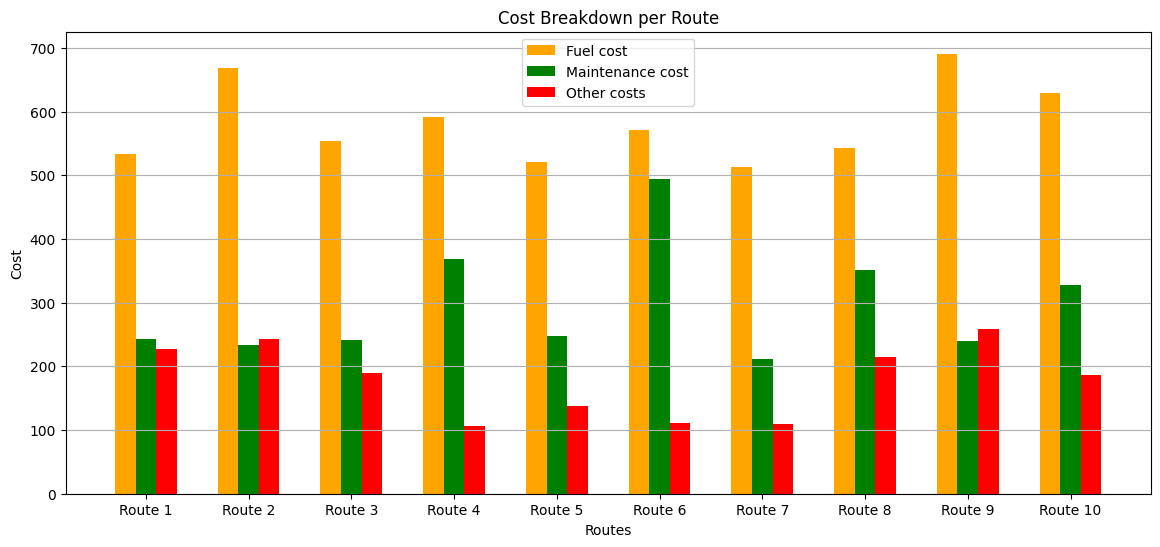

In [10]:
# Visualization of cost breakdown per route
bar_width = 0.2
x = np.arange(num_routes)

plt.figure(figsize=(14, 6))
plt.bar(x - bar_width, fuel_cost_per_route, width=bar_width, label='Fuel cost', color='orange')
plt.bar(x, maintenance_cost_per_route, width=bar_width, label='Maintenance cost', color='green')
plt.bar(x + bar_width, other_cost_per_route, width=bar_width, label='Other costs', color='red')

plt.xticks(x, [f'Route {i+1}' for i in range(num_routes)])
plt.title('Cost Breakdown per Route')
plt.xlabel('Routes')
plt.ylabel('Cost')
plt.legend()
plt.grid(axis='y')
plt.show()


### 4.4 Comparision between optimal solution and randomly generated assignment

To establish a reference point, we compare the optimal solution with the scenario of randomly assigning aircraft to routes.

<br>

To handle the randomness in the assignment process, Monte Carlo simulations were used to calculate the expected value of the random assignments, with n = 10 000 simulations.

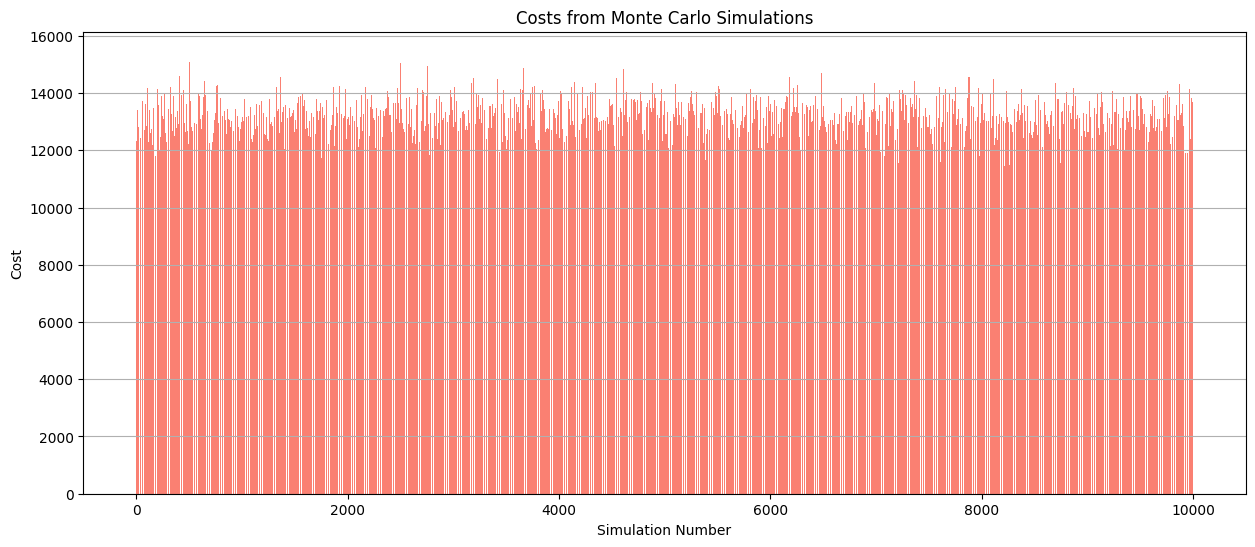

In [11]:
# Function to generate random assignments and calculate cost
def random_assignment(num_planes, num_routes):
    assignments_random = np.zeros((num_planes, num_routes))
    for j in range(num_routes):
        i = np.random.choice(range(num_planes))
        assignments_random[i, j] = 1
    return assignments_random

# Monte Carlo simulation to get the average random cost
def monte_carlo_simulation(num_simulations, num_planes, num_routes, total_costs):
    total_random_costs = 0

    random_costs = []  # List to hold costs of each simulation

    for _ in range(num_simulations):
        random_assignments = random_assignment(num_planes, num_routes)
        random_cost = sum(total_costs[i, j] * random_assignments[i, j] for i in range(num_planes) for j in range(num_routes))
        total_random_costs += random_cost

        random_costs.append(random_cost)  # Store each random cost

    average_random_cost = total_random_costs / num_simulations
    return average_random_cost, random_costs # ##

# Set the number of simulations
num_simulations = 10000

# Run Monte Carlo simulation to get average random cost
average_random_cost, random_costs = monte_carlo_simulation(num_simulations, num_planes, num_routes, total_costs)

# Plotting the costs for each simulation
plt.figure(figsize=(15, 6))
plt.bar(range(num_simulations), random_costs, color='salmon')
plt.xlabel('Simulation Number')
plt.ylabel('Cost')
plt.title('Costs from Monte Carlo Simulations')
plt.grid(axis='y')
plt.show()


In [12]:
# Check for minimum and maximum values from the monte carle simulations
min_cost = np.min(random_costs)
max_cost = np.max(random_costs)

print(f"Minimum value in random_costs: {min_cost}")
print(f"Maximum value in random_costs: {max_cost}")


Minimum value in random_costs: 10989.0
Maximum value in random_costs: 15374.0


Optimized cost: 10561.00
Average random cost (Monte Carlo): 13246.56
Improvement: 2685.56
Percentage improvement: 20.27%



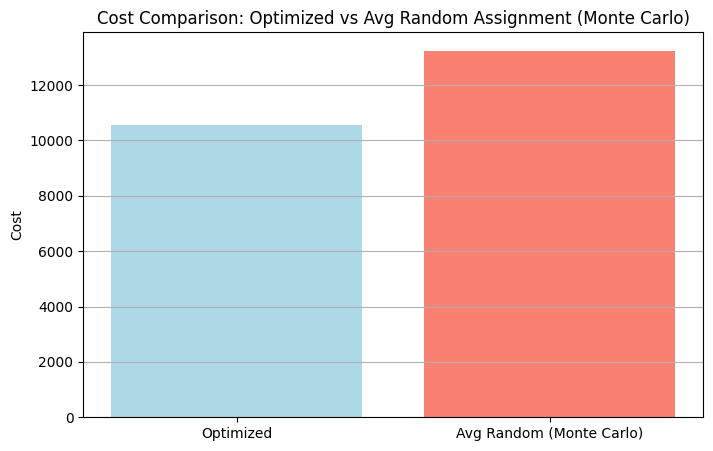

In [13]:
# Compare costs
improvement = average_random_cost - optimized_cost
percentage_improvement = (improvement / average_random_cost) * 100

print(f'Optimized cost: {optimized_cost:.2f}')

#print(f'Optimized cost: {optimized_cost:.2f}')
print(f'Average random cost (Monte Carlo): {average_random_cost:.2f}')
print(f'Improvement: {improvement:.2f}')
print(f'Percentage improvement: {percentage_improvement:.2f}%')
print()

# Visualize the results
labels = ['Optimized', 'Avg Random (Monte Carlo)']
costs = [optimized_cost, average_random_cost]

plt.figure(figsize=(8, 5))
plt.bar(labels, costs, color=['lightblue', 'salmon'])
plt.ylabel('Cost')
plt.title('Cost Comparison: Optimized vs Avg Random Assignment (Monte Carlo)')
plt.grid(axis='y')

plt.show()

The results indicate a significant cost reduction of approx 20% when using the optimization model over random assignments. This verifies the effectiveness of mathematical optimization for solving the tail assignment problem.

<br>

## 5.Discussion

Efficiently assigning aircraft to routes is important for minimizing operational costs while fulfilling the constraints. In this case study, I formulated a Tail Assignment Problem (TAP) to tackle this problem. By generating random cost matrices representing fuel, maintenance, and crew costs, I aggregated these into a total cost matrix. In real scenarios, these costs would come from actual company data. There could also be other additional costs such as airport fees etc.

<br>

The objective was to find the optimal aircraft-route combinations, ensuring each route is assigned with exactly one aircraft. I implemented this model using binary integer programming with Pyomo and solved it with the open source GLPK solver. An optimal solution was found.

<br>

To summarize the results, I visualized the total operational costs associated with each route, breaking them down into their respective subcosts: fuel, maintenance, and crew. I compared the optimal solution to the expected value of random assignments obtained through Monte Carlo simulations, with n=10000. This comparison revealed a significant cost reduction of 20% when using the optimization model over random assignments.

<br>

## 6.Conclusions

This study highlights the benefits of using mathematical optimization in minimizing costs when assigning aircraft to routes. By demonstrating the advantages of this approach over random allocations, I showcased a potential for significant cost savings.

<br>

For large-scale problems, column generation proves to be an effective method. This technique solves a restricted master problem using a subset of variables, allowing it to handle large datasets more efficiently.

<br>

Heuristics like Tabu Search could be another option. I used that approach in my masters thesis as SAS for finding swap opportunities between flights to reduce delays and their propagations. Even if heuristics don't guarantee a global optimum, they run faster than MILP models, which makes them suitable for large-scale applications where near-optimal solutions are good enough.

<br>

In real-world operations, more constraints must be taken into consideration such as crew regulations, maintenance, aircraft availability, balancing of flight hours etc. to name a few. While the simplified TAP formulation demonstrates significant cost savings, these additional constraints will most likely limit the feasible region and reduce the expected improvements. However, the airline industry is highly competitive, where small improvements in efficiency can have a huge impact.